In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Useful information

## Tutorial

- [Python Plotting With Matplotlib (Guide), Feb. 28, 2018, realpython.com](https://realpython.com/blog/python/python-matplotlib-guide/)

## General

- [Styling plots for publication with matplotlib](http://jonchar.net/notebooks/matplotlib-styling/)
- [Effectively Using Matplotlib](http://pbpython.com/effective-matplotlib.html) - nice explanation of object oriented interface
- Interactivity examples: [event_handling Examples](https://matplotlib.org/examples/event_handling/index.html)

## Publication quality plots

- [Creating publication-quality figures with Matplotlib](https://github.com/jbmouret/matplotlib_for_papers)
- [Physical Modeling With Python - Making Plots for Publication](http://physicalmodelingwithpython.blogspot.com/2015/06/making-plots-for-publication.html)
- [Publication-Quality Plots with Matplotlib](https://www.bastibl.net/publication-quality-plots/)


## Other interesting things

[mpldatacursor](https://github.com/joferkington/mpldatacursor) - provides interactive "data cursors" (clickable annotation boxes) for matplotlib, by Joe Kington
5/22/18 - [Constrained Layout Guide - replacement for tight_layout](https://matplotlib.org/tutorials/intermediate/constrainedlayout_guide.html) - Matplotlib 2.2, `fig, ax = plt.subplots(constrained_layout=True)`

# Use Log axis or axes

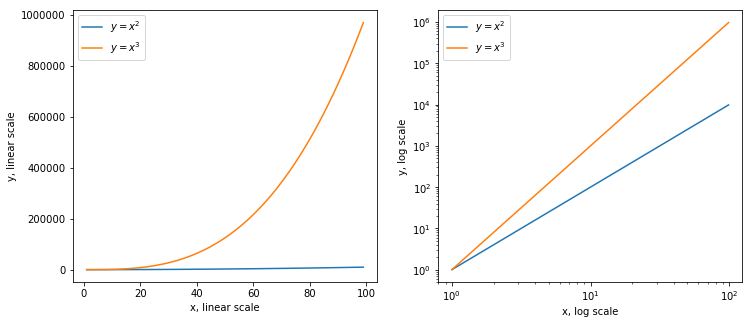

In [2]:
x = np.arange(1, 100)
y2 = pow(x, 2)
y3 = pow(x, 3)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(x, y2, label='$y=x^2$')
ax1.plot(x, y3, label='$y=x^3$')
ax1.set_xlabel('x, linear scale')
ax1.set_ylabel('y, linear scale')
ax1.legend(loc='upper left')

ax2.set_xscale("log", nonposx='clip') # this will clip negative values, usually not needed
ax2.set_yscale("log", nonposy='clip') # this will clip negative values, usually not needed
ax2.plot(x, y2, label='$y=x^2$')
ax2.plot(x, y3, label='$y=x^3$')
ax2.set_xlabel('x, log scale')
ax2.set_ylabel('y, log scale')
ax2.legend(loc='upper left');

# Legends

## Put legend outside plot

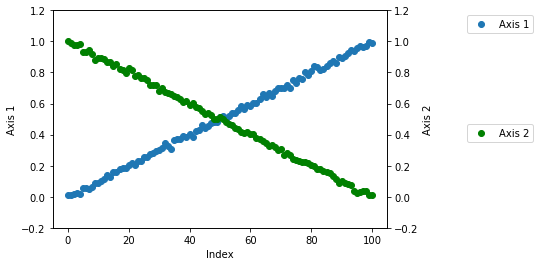

In [3]:
x = np.linspace(0, 100, num=101)
y1 = 0.01*x + np.random.normal(0, 0.01, len(x))
y2 = 1 - 0.01*x + np.random.normal(0, 0.01, len(x))

fig, ax = plt.subplots(figsize=(10,4))
ax2 = ax.twinx()
# Shrink current axis by 40%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.6, box2.height])

ax.plot(x, y1, 'o', label='Axis 1')
ax2.plot(x, y2, 'o', color='g', label='Axis 2')

ax.set_ylim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)

ax.set_xlabel('Index')
ax.set_ylabel('Axis 1')
ax2.set_ylabel('Axis 2')

ax.legend(bbox_to_anchor=(1.45, 1.0))
ax2.legend(bbox_to_anchor=(1.45, 0.5))

## One legend for two vertical axis

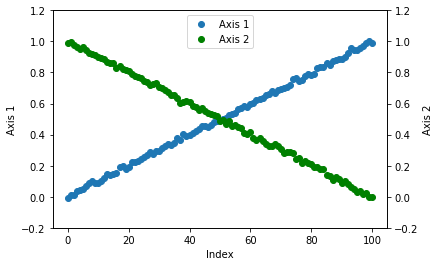

In [4]:
x = np.linspace(0, 100, num=101)
y1 = 0.01*x + np.random.normal(0, 0.01, len(x))
y2 = 1 - 0.01*x + np.random.normal(0, 0.01, len(x))

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(x, y1, 'o', label='Axis 1')
ax2.plot(x, y2, 'o', color='g', label='Axis 2')

ax.set_ylim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)

ax.set_xlabel('Index')
ax.set_ylabel('Axis 1')
ax2.set_ylabel('Axis 2')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Always use last axis's legend command
ax2.legend(lines + lines2, labels + labels2, loc='upper center') 

## Specify `rcParams` and custom legend with 2 columns

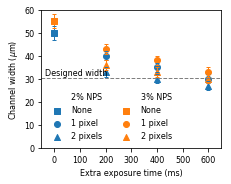

In [5]:
# Set up rcParams
matplotlib_plot_width = 3.26
golden_ratio = 1.618
other_ratio = 1.25
matplotlib_aspect_ratio = other_ratio
params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 8,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [matplotlib_plot_width, matplotlib_plot_width/matplotlib_aspect_ratio]
   }
mpl.rcParams.update(params)

# Create dummy data: 
# [exp_time_ms, mean_channel_width_um, std_channel_width_um]
dummy_2per_0px = np.array([[0, 50, 3]])
dummy_2per_1px = np.array([[200, 40, 2], [400, 35, 2], [600, 30, 2]])
dummy_2per_2px = np.array([[200, 33, 2], [400, 30, 2], [600, 27, 2]])
dummy_3per_0px = np.array([[0, 55, 3]])
dummy_3per_1px = np.array([[200, 43, 2], [400, 38, 2], [600, 33, 2]])
dummy_3per_2px = np.array([[200, 36, 2], [400, 33, 2], [600, 30, 2]])

# Function to add scatter plot and error bars
def add_scatter_with_errorbar(ax, data, label, color, marker):
    ax.errorbar(data[:, 0], data[:, 1], data[:, 2], 
                color=color, capsize=2, elinewidth=1, lw=0)
    ax.scatter(data[:, 0], data[:, 1], color=color, 
               marker=marker, label=label)

# Define markers
markers = ['s', 'o', '^']

# Make plot
fig, ax = plt.subplots()
# Use first color in color palette
color = 'C0'
ax.scatter([0], [0], marker='None', linestyle='None', label='dummy 1')
add_scatter_with_errorbar(ax, dummy_2per_0px, 'None', color, markers[0])
add_scatter_with_errorbar(ax, dummy_2per_1px, '1 pixel', color, markers[1])
add_scatter_with_errorbar(ax, dummy_2per_2px, '2 pixels', color, markers[2])
# Use second color in color palette
color = 'C1'
ax.scatter([0], [0], marker='None', linestyle='None', label='dummy 2')
add_scatter_with_errorbar(ax, dummy_3per_0px, 'None', color, markers[0])
add_scatter_with_errorbar(ax, dummy_3per_1px, '1 pixel', color, markers[1])
add_scatter_with_errorbar(ax, dummy_3per_2px, '2 pixels', color, markers[2])
ax.axhline(y=7.56*4, color='0.5', ls='--', lw=1)

ax.set_xlim(-50, 650)
ax.set_ylim(0, 60)
ax.set_xlabel('Extra exposure time (ms)')
ax.set_ylabel('Channel width ($\mu$m)')
ax.text(-35, 31.5, 'Designed width')

lines, labels = ax.get_legend_handles_labels()
new_labels = ['2% NPS', *labels[1:4], '3% NPS', *labels[5:]]
ax.legend(lines, new_labels, ncol=2, frameon=False, loc='lower left')

plt.tight_layout()

## Scatter & line plot with custom legend

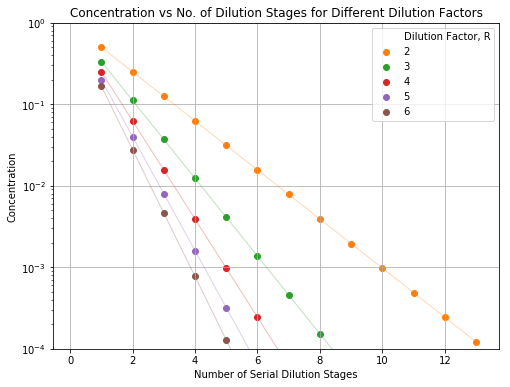

In [3]:
m_values = np.arange(1, 14)
R_values = np.array([2, 3, 4, 5, 6])
dilutions = np.zeros(shape=(len(m_values), len(R_values)))

for j in range(len(R_values)):
    R = R_values[j]
    for i in range(len(m_values)):
        m = m_values[i]
        dilutions[i, j] = 1./(R**m)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_yscale("log", nonposx='clip') # this will clip negative values, usually not needed
ax.plot([1, 0.1], [1, 0.1], marker='None', linestyle='None', label='dummy 1')
for j in range(len(R_values)):
    R = R_values[j]
    color=next(ax._get_lines.prop_cycler)['color']
    ax.scatter(m_values, dilutions[:, j], label="{}".format(R), color=color)
    ax.plot(m_values, dilutions[:, j], label="{}".format(R), color=color, linewidth=1, alpha=0.3)
ax.grid()
ax.set_ylim(top=1.0, bottom=1e-4)
ax.set_xlabel("Number of Serial Dilution Stages")
ax.set_ylabel("Concentration")
lines, labels = ax.get_legend_handles_labels()
new_labels = ['Dilution Factor, R', *labels[1:6]]
new_lines = [lines[0], *lines[6:]]
ax.legend(new_lines, new_labels)
ax.set_title('Concentration vs No. of Dilution Stages for Different Dilution Factors');

In [4]:
labels

['dummy 1', '2', '3', '4', '5', '6', '2', '3', '4', '5', '6']

In [5]:
lines

# Get line color

## Method 1: `var = ax.plot()`

- Set a variable equal to ax.plot(): `var = ax.plot(...)`
- The variable is a list with 1 element, which is a Line2D object
- Execute get_color() method on that the Line2D object: `color = var[0].get_color()`

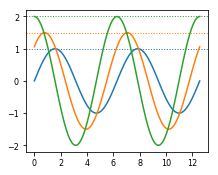

In [6]:
xx = np.linspace(0, 4 * np.pi, 101)
data0 = np.sin(xx)
data1 = 1.5 * np.sin(xx + np.pi/4)
data2 = 2 * np.sin(xx + np.pi/2)
data = [data0, data1, data2]
fig, ax = plt.subplots()
for d in data:
    l = ax.plot(xx, d)
    color = l[0].get_color()
    ax.axhline(max(d), c=color, linestyle=':', linewidth=1)

## Method 2: `ax.lines`

- After plotting all of the desired lines, `ax.lines` contains a list of the corresponding Line2D objects in the order they were added to the plot.
- The color for the $i^{th}$ Line2D object is `ax.lines[i].get_color()`

Line2D(Line 0) #1f77b4
Line2D(Line 1) #ff7f0e
Line2D(Line 2) #2ca02c


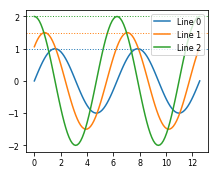

In [7]:
xx = np.linspace(0, 4 * np.pi, 101)
data0 = np.sin(xx)
data1 = 1.5 * np.sin(xx + np.pi/4)
data2 = 2 * np.sin(xx + np.pi/2)
data = [data0, data1, data2]
fig, ax = plt.subplots()
for i, d in enumerate(data):
    ax.plot(xx, d, label='Line {}'.format(i))
for line in ax.lines:
    print(line, line.get_color())
for d, line in zip(data, ax.lines):
    ax.axhline(max(d), c=line.get_color(), linestyle=':', linewidth=1)
ax.legend();

In [8]:
for line in ax.lines:
    print(line, line.get_color())

Line2D(Line 0) #1f77b4
Line2D(Line 1) #ff7f0e
Line2D(Line 2) #2ca02c
Line2D(_line3) #1f77b4
Line2D(_line4) #ff7f0e
Line2D(_line5) #2ca02c


# Misc

## Directly pass `dict` with data to `plot`, and use `ax.set`

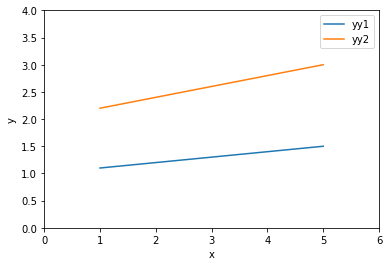

In [9]:
data = {'x': [1, 2, 3, 4, 5],
        'yy1': [1.1, 1.2, 1.3, 1.4, 1.5],
        'yy2': [2.2, 2.4, 2.6, 2.8, 3.]}

fig, ax = plt.subplots()
ax.plot('x', 'yy1', label='yy1', data=data)
ax.plot('x', 'yy2', label='yy2', data=data)
ax.set(xlabel = 'x', ylabel='y', xlim=(0,6), ylim=(0,4))
ax.legend();

## Bar chart - custom labels & color specific bars

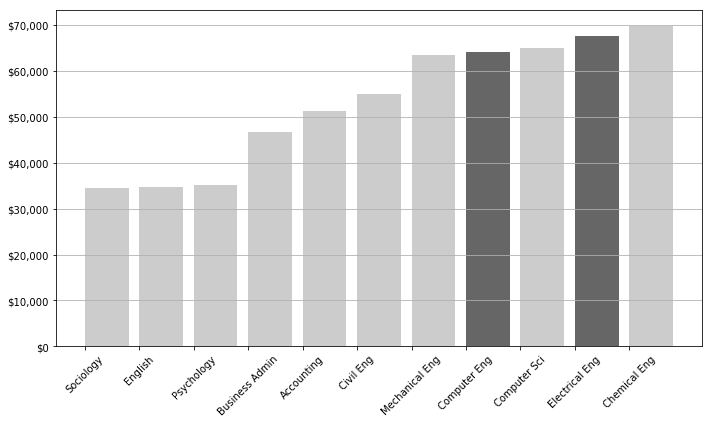

In [2]:
salaries_BS = {
    'Sociology': 34441, 
    'English': 34702, 
    'Psychology': 35061, 
    'Business Admin': 46653, 
    'Accounting': 51310,
    'Civil Eng': 55063, 
    'Mechanical Eng': 63532, 
    'Computer Eng': 64155,  
    'Computer Sci': 65004, 
    'Electrical Eng': 67603, 
    'Chemical Eng': 69778
}

xlabels = []
values = []
for item in salaries_BS.items():
    xlabels.append(item[0])
    values.append(item[1])
ylabels = ['$0', '$10,000', '$20,000', '$30,000', '$40,000', '$50,000', '$60,000', '$70,000']

fig, ax = plt.subplots(figsize=(10,6))
bar = ax.bar(range(len(xlabels)), values, color='0.8', align='edge')
grey_value = 0.4
eng_color = (grey_value, grey_value, grey_value, 1.0)
bar[7].set_color(eng_color)
bar[9].set_color(eng_color)
#ax.tick_params(bottom='off')
# Set number of ticks for x-axis
ax.set_xticks(range(len(xlabels)))
# Set ticks labels for x-axis
ax.set_xticklabels(xlabels, rotation=45)
# Set ticks labels for 7-axis
ax.set_yticklabels(ylabels)
ax.grid(which='major', axis='y')
plt.tight_layout()
#plt.savefig('salaries.eps')

# Plot Attributes

From [Part 3 of AnatomyOfMatplotlib, Ben Root 3 hour Tutorial at SciPy 2017](https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/README.md).

## Markers

[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  ||marker    |  description  ||marker    |  description  ||marker    |  description  
:----------|:--------------||:---------|:--------------||:---------|:--------------||:---------|:--------------
"."        |  point        ||"+"       |  plus         ||","       |  pixel        ||"x"       |  cross
"o"        |  circle       ||"D"       |  diamond      ||"d"       |  thin_diamond ||          |
"8"        |  octagon      ||"s"       |  square       ||"p"       |  pentagon     ||"\*"      |  star
"&#124;"   |  vertical line||"\_"      | horizontal line ||"h"     |  hexagon1     ||"H"       |  hexagon2
0          |  tickleft     ||4         |  caretleft    ||"<"       | triangle_left ||"3"       |  tri_left
1          |  tickright    ||5         |  caretright   ||">"       | triangle_right||"4"       |  tri_right
2          |  tickup       ||6         |  caretup      ||"^"       | triangle_up   ||"2"       |  tri_up
3          |  tickdown     ||7         |  caretdown    ||"v"       | triangle_down ||"1"       |  tri_down
"None"     |  nothing      ||`None`    |  nothing      ||" "       |  nothing      ||""        |  nothing

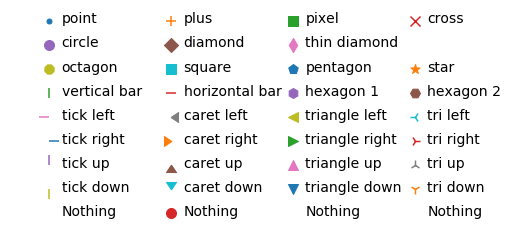

In [10]:
xs, ys = np.mgrid[:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "Nothing", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()
plt.show()

In [11]:
print('xs\n', xs)
print('ys\n', ys)
print('xs.T.flat:', list(xs.T.flat))
print('ys.T.flat:', list(ys.T.flat))

xs
 [[0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]]
ys
 [[9 8 7 6 5 4 3 2 1]
 [9 8 7 6 5 4 3 2 1]
 [9 8 7 6 5 4 3 2 1]
 [9 8 7 6 5 4 3 2 1]]
xs.T.flat: [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
ys.T.flat: [9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1]


## Linestyles
Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

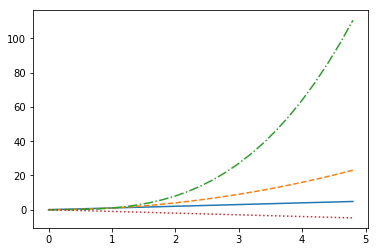

In [12]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, '-', t, t**2, '--', t, t**3, '-.', t, -t, ':')
plt.show()

# Layouts

## Using `subplot2grid` - different sized subplots

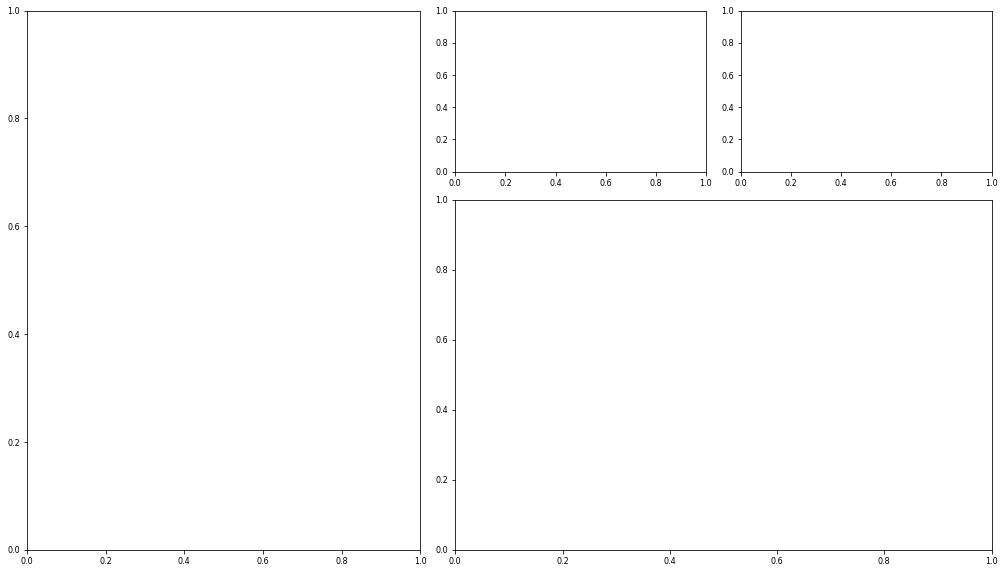

In [9]:
fig = plt.figure(figsize=(14,8))
ax1 = plt.subplot2grid((3, 7), (0, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((3, 7), (0, 3), colspan=2)
ax3 = plt.subplot2grid((3, 7), (0, 5), colspan=2)
ax4 = plt.subplot2grid((3, 7), (1, 3), colspan=4, rowspan=2)
plt.tight_layout()

##  `suptitle` with `tight_layout` and `subplots_adjust` so suptitle stays on image with `savefig`

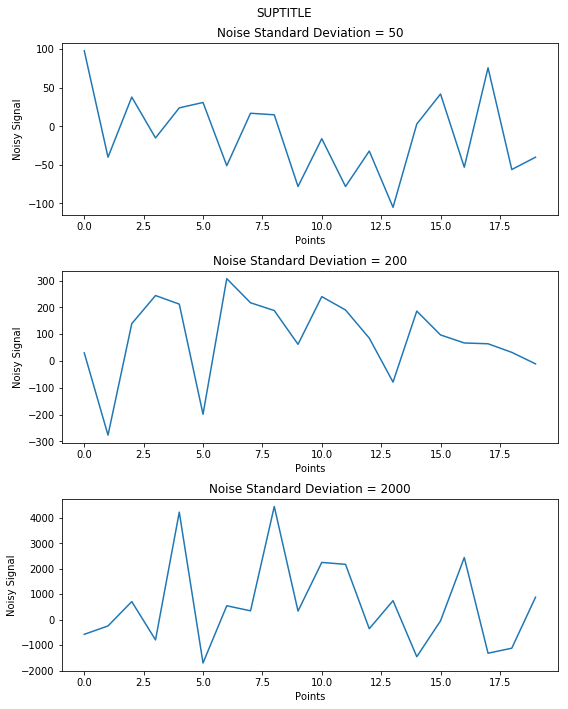

In [8]:
stdev = [50, 200, 2000]
noisy_signals = []
npnts = 20
x = np.arange(20)

for std in stdev:
    noisy_signals.append(np.rint(std * np.random.randn(npnts)))

n = len(stdev)
fig, axs = plt.subplots(nrows=n, ncols=1, figsize=(8,10))
for ax, std, signal in zip(axs, stdev, noisy_signals):
    ax.plot(x, signal)
    ax.set_title('Noise Standard Deviation = {}'.format(std))

for ax in axs:
    ax.set_xlabel('Points')
    ax.set_ylabel('Noisy Signal')
fig.suptitle('suptitle'.upper());
plt.tight_layout()
plt.subplots_adjust(top=0.93) # MUST COME AFTER plt.tight_layout()
# plt.savefig('order2.png')

## Prevent default use of offset for axis tick labels

### Example of the problem

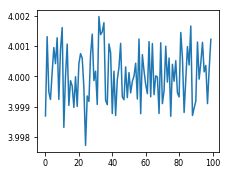

In [10]:
noise = np.random.normal(0, 0.001, 100)
signal = 4.0 + noise

fig, ax = plt.subplots()
ax.plot(signal);

### Solution

See Dataman's comment to the solution at [format axis offset-values to whole numbers or specific number](http://stackoverflow.com/questions/3677368/matplotlib-format-axis-offset-values-to-whole-numbers-or-specific-number)

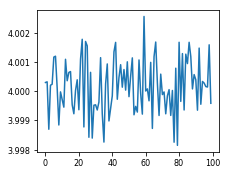

In [11]:
noise = np.random.normal(0, 0.001, 100)
signal = 4.0 + noise

fig, ax = plt.subplots()
ax.plot(signal)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

## Don't use scientific notation in axis tick labels

### Example of the problem

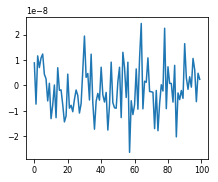

In [12]:
y = np.random.normal(0, 1e-8, 100)
fig, ax = plt.subplots()
ax.plot(y);

### Solution

See answer to [How to prevent numbers being changed to exponential form in Python matplotlib figure](http://stackoverflow.com/questions/14711655/how-to-prevent-numbers-being-changed-to-exponential-form-in-python-matplotlib-fi)

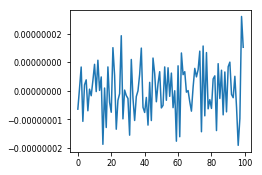

In [13]:
y = np.random.normal(0, 1e-8, 100)
fig, ax = plt.subplots()
ax.plot(y)
ax.get_yaxis().get_major_formatter().set_scientific(False)

## Eliminate some subplots in an array of subplots

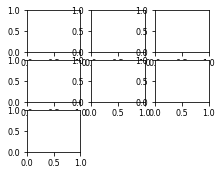

In [14]:
fig, axs  = plt.subplots(3,3)
fig.delaxes(axs[-1, -1])
fig.delaxes(axs[-1, -2])

## Plot an array of images as a set of subplots

Images are slices of a 3D numpy array

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
15 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
4 4


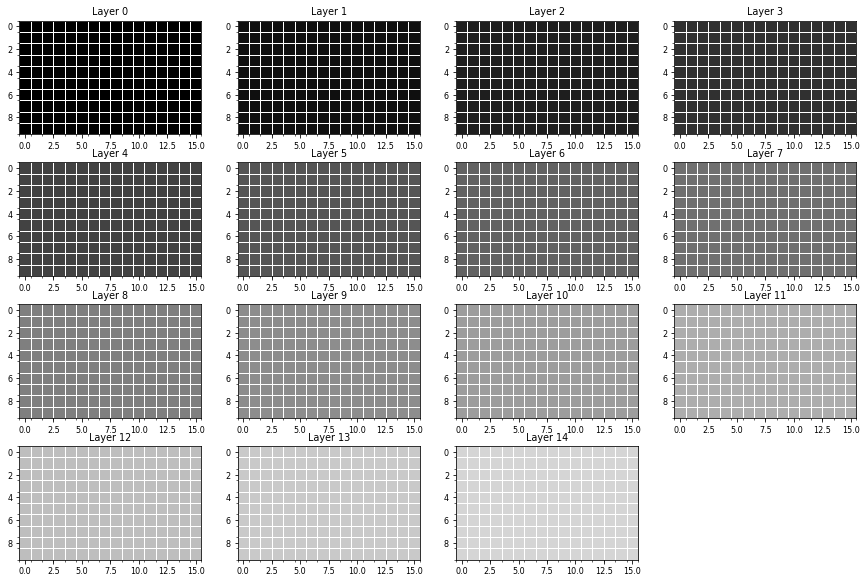

In [15]:
def _layer_image(image, ax, layer, show_grid_lines = False):
    ax.imshow(image[:,:,layer], interpolation="None", cmap="Greys_r", vmin = 0, vmax = 255 )
    ax.set_title("Layer {}".format(layer))
    if show_grid_lines:
        # Minor ticks
        ax.set_xticks(np.arange(-.5, image.shape[1], 1), minor=True);
        ax.set_yticks(np.arange(-.5, image.shape[0], 1), minor=True);
        # Gridlines based on minor ticks
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    else:
        ax.set_axis_off()


def show_multiple_layers(layers, num_cols, image, show_grid_lines = False):
    if len(layers) == 1:
        fig, axs = plt.subplots()
        _layer_image(image, axs, layers[0], show_grid_lines)
    else:
        nrows = math.ceil(len(layers)/num_cols)
        ncols = num_cols if (len(layers) > num_cols) else len(layers)
        print(len(layers), layers)
        print(nrows, ncols)
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,2.5*nrows))
        for ax, layer in zip(axs.flat, layers):
            _layer_image(image, ax, layer, show_grid_lines)
        for ax in axs.flat[axs.size - 1:len(layers) - 1:-1]:
            ax.set_visible(False)
    return fig, axs

        
#     for row in range(nrows):
#         for col in range(ncols):
#             layer_index = row*num_cols + col
#             print(row, col, layer_index)
#             _layer_image(image, axs[row,col], layers[row*num_cols + col], show_grid_lines)

temp_num_layers = 20
test_vol = np.zeros((10, 16, temp_num_layers), dtype="uint8")
for i in range(temp_num_layers):
    test_vol[:,:,i] = 255 * (i/(temp_num_layers-1))
    #print(i, test_vol[0,0,i])

layers = list(range(15))
print(layers)
show_multiple_layers(layers, 4, test_vol, True);

## Parasite (extra) axes

Example from `AnatomyOfMatplotlib-Part6-mpl_toolkits.ipynb` in `AnatomyOfMatplotlib`. Makes use of the [AxesGrid toolkit](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html).

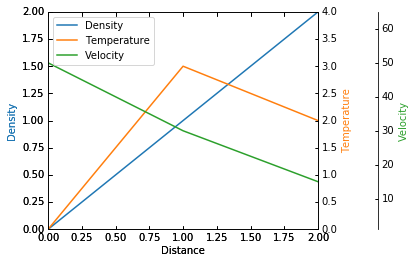

In [3]:
# %load http://matplotlib.org/mpl_examples/axes_grid/demo_parasite_axes2.py
"""
Parasite axis demo

The following code is an example of a parasite axis. It aims to show a user how
to plot multiple different values onto one single plot. Notice how in this
example, par1 and par2 are both calling twinx meaning both are tied directly to
the x-axis. From there, each of those two axis can behave separately from the
each other, meaning they can take on separate values from themselves as well as
the x-axis.
"""
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlim(0, 2)
host.set_ylim(0, 2)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.show()

# Heatmaps

[[-0.30103    -0.60205999 -0.90308999 -1.20411998 -1.50514998 -1.80617997
  -2.10720997]
 [-0.47712125 -0.95424251 -1.43136376 -1.90848502 -2.38560627 -2.86272753
  -3.33984878]
 [-0.60205999 -1.20411998 -1.80617997 -2.40823997 -3.01029996 -3.61235995
  -4.21441994]
 [-0.69897    -1.39794001 -2.09691001 -2.79588002 -3.49485002 -4.19382003
  -4.89279003]
 [-0.77815125 -1.5563025  -2.33445375 -3.112605   -3.89075625 -4.6689075
  -5.44705875]
 [-0.84509804 -1.69019608 -2.53529412 -3.38039216 -4.2254902  -5.07058824
  -5.91568628]
 [-0.90308999 -1.80617997 -2.70926996 -3.61235995 -4.51544993 -5.41853992
  -6.32162991]
 [-0.95424251 -1.90848502 -2.86272753 -3.81697004 -4.77121255 -5.72545506
  -6.67969757]
 [-1.         -2.         -3.         -4.         -5.         -6.         -7.        ]]


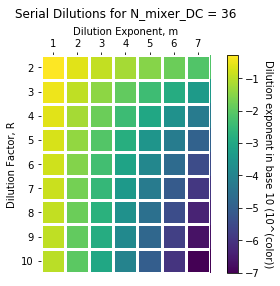

In [4]:
N_mixer_DC = 36

R = np.arange(2, 11)
M = np.arange(1,8)
Rm = np.zeros((len(R),len(M)))

for r in R:
    test_value = math.log(N_mixer_DC, r)
    index = int(test_value)
#     print(r, test_value, index)
    for m in M:
        Rm[r-2,m-1] = math.log(1./(r**m), 10)
#         if m <= math.log(N_mixer_DC, r):
#             Rm[r-2,m-1] = math.log(1./(r**m), 10)
print(Rm)

# See https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(Rm)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Dilution exponent in base 10 (10^(color))', rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(M)))
ax.set_yticks(np.arange(len(R)))
# ... and label them with the respective list entries
ax.set_xticklabels(M)
ax.set_yticklabels(R)
# Let the horizontal axes labeling appear on top
ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(Rm.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(Rm.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

ax.xaxis.set_label_position('top') 
ax.set_xlabel('Dilution Exponent, m')
ax.set_ylabel('Dilution Factor, R',  )

# # Loop over data dimensions and create text annotations.
# for i in range(len(vegetables)):
#     for j in range(len(farmers)):
#         text = ax.text(j, i, harvest[i, j],
#                        ha="center", va="center", color="w")

ax.set_title("Serial Dilutions for N_mixer_DC = {}".format(N_mixer_DC), y=1.15);
# fig.tight_layout()